In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.vq as vq

matX = np.loadtxt('q3dm1-path2.csv', delimiter=',')

## task 15.3: estimating Markov chains

In [2]:
clusters_num = 10
matM, inds = vq.kmeans2(matX, k=clusters_num, iter=100, minit='++')

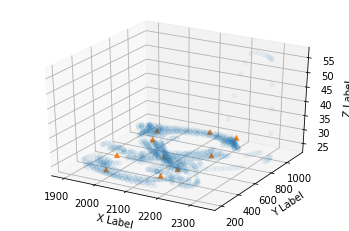

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(matX[:,1],matX[:,0],matX[:,2], marker='o',alpha=0.05)
ax.scatter(matM[:,1],matM[:,0],matM[:,2], marker='^',alpha=1)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [4]:
def get_dist(x1, x2):
    return np.sum((x1-x2)**2)**0.5

def get_state_seq(matX, matM):
    seq = []
    seq_idx = []
    for x in matX:
        idx = None
        state = None
        state_dist = np.inf
        for i, m in enumerate(matM):
            dist = get_dist(x,m)
            if dist < state_dist:
                idx = i
                state = m 
                state_dist = dist
        seq.append(state)
        seq_idx.append(idx)
    return np.array(seq), np.array(seq_idx)

def estimate_transisions(seq_idx):
    matP = np.zeros((clusters_num,clusters_num))
    
    for s in range(clusters_num):
        x_s = np.where((seq_idx == s))
        for x in x_s[0]:
            if (x+1) >= seq_idx.shape[0]:
                continue
            succ_state = seq_idx[x+1]
            matP[s,succ_state] += 1
    matP /= matP.sum(axis=1)
    return matP

In [5]:
seq, seq_idx = get_state_seq(matX, matM)
matP = estimate_transisions(seq_idx)
(np.round(matP, 2))

array([[0.92, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.05, 0.  , 0.  ],
       [0.  , 0.92, 0.07, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.08, 0.  , 0.92, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.91, 0.  , 0.  , 0.09, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.92, 0.  , 0.  , 0.  , 0.08, 0.  ],
       [0.  , 0.  , 0.  , 0.01, 0.  , 0.94, 0.  , 0.  , 0.  , 0.08],
       [0.  , 0.08, 0.  , 0.  , 0.  , 0.  , 0.91, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.08, 0.  , 0.06, 0.  , 0.92, 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.04, 0.92, 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.08, 0.  , 0.  , 0.  , 0.  , 0.92]])

In [6]:
matX = np.loadtxt('q3dm1-path1.csv', delimiter=',')
matM, inds = vq.kmeans2(matX, k=clusters_num, iter=100, minit='++')

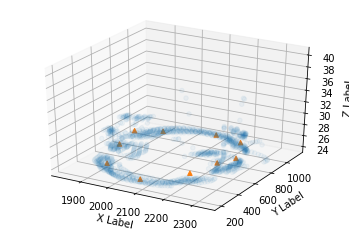

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(matX[:,1],matX[:,0],matX[:,2], marker='o',alpha=0.05)
ax.scatter(matM[:,1],matM[:,0],matM[:,2], marker='^',alpha=1)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [8]:
seq, seq_idx = get_state_seq(matX, matM)
matP = estimate_transisions(seq_idx)
(np.round(matP, 2))

array([[0.92, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.07, 0.  ],
       [0.  , 0.93, 0.  , 0.07, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.92, 0.  , 0.  , 0.  , 0.  , 0.08, 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.93, 0.  , 0.  , 0.  , 0.  , 0.  , 0.07],
       [0.08, 0.  , 0.  , 0.  , 0.92, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.93, 0.07, 0.  , 0.  , 0.  ],
       [0.  , 0.07, 0.  , 0.  , 0.  , 0.  , 0.93, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.08, 0.  , 0.  , 0.92, 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.07, 0.  , 0.  , 0.93, 0.  ],
       [0.  , 0.  , 0.08, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.93]])